In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Load the dataset (adjust file path and format as needed)
df = pd.read_csv(r"C:\Users\prakh\Desktop\Research_Project\satellite_data\orbital_elements\Fengyun-2F.csv", parse_dates=[0])  # Assuming first column is datetime

# Rename columns to remove spaces
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Convert datetime column to proper format (if not done already)
#df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0], dayfirst=True)  # Adjust based on date format

# Convert numeric columns to float (excluding datetime column)
#df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors="coerce")

# Handle missing values (fill or drop)
#df.dropna(inplace=True)  # Or df.fillna(value, inplace=True)

# Display processed data
print(df.head())

# Save cleaned data
df.to_csv("cleaned_data.csv", index=False)


                  Unnamed:_0  eccentricity  argument_of_perigee  inclination  \
0 2012-09-06 18:48:32.050655      0.000488             4.483911     0.032940   
1 2012-09-07 19:39:45.383327      0.000487             4.481215     0.032901   
2 2012-09-08 15:43:39.075167      0.000487             4.475122     0.032868   
3 2012-09-09 12:53:36.595967      0.000492             4.481063     0.032835   
4 2012-09-10 13:15:22.135391      0.000495             4.512943     0.032798   

   mean_anomaly  Brouwer_mean_motion  right_ascension  
0     -2.689729             0.004374         4.842139  
1     -2.446726             0.004374         4.842234  
2     -3.457326             0.004374         4.842332  
3     -4.190783             0.004374         4.842201  
4     -4.111348             0.004374         4.842257  


In [2]:
df.index

RangeIndex(start=0, stop=2985, step=1)

In [3]:
df.first_valid_index(), df.last_valid_index()

(0, 2984)

In [4]:
!pip install skimpy


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from skimpy import skim
skim(df)

C:\Users\prakh\Desktop\Research_Project\venv\lib\site-packages\polars\meta\build.py:5: UserWarning: Polars binary is missing!
  from polars._utils.polars_version import get_polars_version


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2985   │ │ float64     │ 6     │                                                          │
│ │ Number of columns │ 7      │ │ datetime64  │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column   ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ eccentri │  0 │    0 │ 0.000268 │ 0.000140 │ 1.62e-05 │ 0.000164 │ 0.000253 │ 0.000359 │ 0.002877 │   ▇    │  │
│ │ city     │    │      │          │        7 │          │        1 │        5 │        5 │          │        │  │
│ │ argument │  0 │    0 │    3.081 │    1.578 │ 0.002423 │    1.881 │    3.513 │    4.236 │    6.283 │ ▅▂▃▇▆▁ │  │
│ │ _of_peri │    │      │          │          │          │          │          │          │          │        │  │
│ │ gee      │    │      │          │          │          │          │          │          │          │        │  │
│ │ inclinat │  0 │    0 │  0.02701 │  0.01448 │ 0.002838 │  0.01557 │  0.02606 │  0.03834 │  0.05956 │ ▇▇▇▆▅▂ │  │
│ │ ion      │    │      │          │          │          │          │          │          │          │        │  │
│ │ mean_ano │  0 │    0 │   -3.231 │    1.783 │   -6.281 │   -4.663 │   -3.433 │   -1.669 │ -0.00233 │ ▆▇▇▆▆▆ │  │
│ │ maly     │    │      │          │          │          │          │          │          │        7 │        │  │
│ │ Brouwer_ │  0 │    0 │ 0.004375 │ 3.378e-0 │ 0.004374 │ 0.004375 │ 0.004375 │ 0.004375 │ 0.004376 │  ▁▇▇▇  │  │
│ │ mean_mot │    │      │          │        7 │          │          │          │          │          │        │  │
│ │ ion      │    │      │          │          │          │          │          │          │          │        │  │
│ │ right_as │  0 │    0 │    2.188 │    1.567 │ 0.003768 │     1.36 │    1.424 │    1.458 │    6.202 │  ▇  ▂  │  │
│ │ cension  │    │      │          │          │          │          │          │          │          │        │  │
│ └──────────┴────┴──────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓  │
│ ┃ column          ┃ NA   ┃ NA %   ┃ first                       ┃ last                        ┃ frequency    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩  │
│ │ Unnamed:_0      │    0 │      0 │ 2012-09-06 18:48:32.050655  │ 2022-01-11 17:26:36.259583  │ None         │  │
│ └─────────────────┴──────┴────────┴─────────────────────────────┴─────────────────────────────┴──────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

<Axes: ylabel='Frequency'>

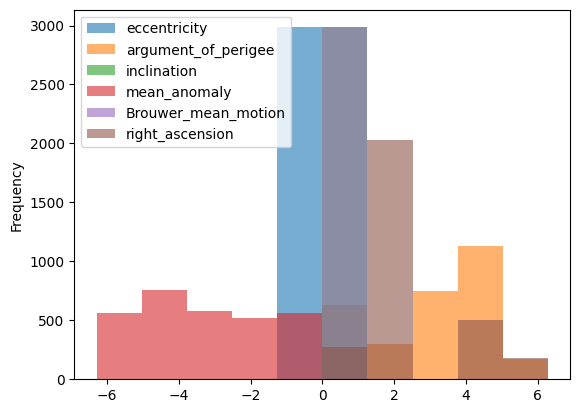

In [6]:
df.plot.hist(alpha=0.6)

In [7]:
df.columns
df.rename(columns={'Unnamed:_0':'Datetime'},inplace=True)

In [8]:
#set Datetime Column as Index
#df.set_index("Datetime",inplace=True)
df.head()

,Datetime,eccentricity,argument_of_perigee,inclination,mean_anomaly,Brouwer_mean_motion,right_ascension
0,2012-09-06 18:48:32.050655,0.000488,4.483911,0.032940,-2.689729,0.004374,4.842139
1,2012-09-07 19:39:45.383327,0.000487,4.481215,0.032901,-2.446726,0.004374,4.842234
2,2012-09-08 15:43:39.075167,0.000487,4.475122,0.032868,-3.457326,0.004374,4.842332
3,2012-09-09 12:53:36.595967,0.000492,4.481063,0.032835,-4.190783,0.004374,4.842201
4,2012-09-10 13:15:22.135391,0.000495,4.512943,0.032798,-4.111348,0.004374,4.842257


In [9]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Datetime,2985,2017-07-18 07:17:49.044295168,2012-09-06 18:48:32.050655,2015-05-24 22:38:02.849856,2017-08-28 06:19:39.741024,2019-10-20 20:19:03.566784,2022-01-11 17:26:36.259583,NaN
eccentricity,2985.0,0.000268,0.000016,0.000164,0.000253,0.00036,0.002877,0.000141
argument_of_perigee,2985.0,3.080858,0.002423,1.880957,3.512791,4.236199,6.283074,1.578471
inclination,2985.0,0.027013,0.002838,0.015568,0.026058,0.038343,0.059559,0.014476
mean_anomaly,2985.0,-3.23124,-6.281169,-4.662804,-3.432794,-1.669105,-0.002337,1.782625
Brouwer_mean_motion,2985.0,0.004375,0.004374,0.004375,0.004375,0.004375,0.004376,0.0
right_ascension,2985.0,2.187677,0.003768,1.359957,1.424098,1.457577,6.201764,1.567024


In [10]:
#Check For Null
df.isnull().sum()

Datetime               0
eccentricity           0
argument_of_perigee    0
inclination            0
mean_anomaly           0
Brouwer_mean_motion    0
right_ascension        0
dtype: int64

In [11]:
# Convert first column to datetime explicitly, handling errors safely
df["Datetime"] = pd.to_datetime(df.iloc[:, 0].astype(str), dayfirst=True, errors='coerce')

# Check if conversion was successful
print(df["Datetime"].dtypes)  # Should be datetime64[ns]

# Drop the original column if it's no longer needed
#f = df.drop(columns=[df.columns[0]])

# Split into 'date' and 'time' columns
df["date"] = df["Datetime"].dt.date#.astype("int64")
df["time"] = df["Datetime"].dt.time#.astype("int64")
#df = df.drop(columns=["Datetime"])
df = df.set_index('Datetime')
print(df.head())
print(df.dtypes)


datetime64[ns]
                            eccentricity  argument_of_perigee  inclination  \
Datetime                                                                     
2012-06-09 18:48:32.050655      0.000488             4.483911     0.032940   
2012-07-09 19:39:45.383327      0.000487             4.481215     0.032901   
2012-08-09 15:43:39.075167      0.000487             4.475122     0.032868   
2012-09-09 12:53:36.595967      0.000492             4.481063     0.032835   
2012-10-09 13:15:22.135391      0.000495             4.512943     0.032798   

                            mean_anomaly  Brouwer_mean_motion  \
Datetime                                                        
2012-06-09 18:48:32.050655     -2.689729             0.004374   
2012-07-09 19:39:45.383327     -2.446726             0.004374   
2012-08-09 15:43:39.075167     -3.457326             0.004374   
2012-09-09 12:53:36.595967     -4.190783             0.004374   
2012-10-09 13:15:22.135391     -4.111348        

In [12]:
df_plot=df.iloc[:, :-2]

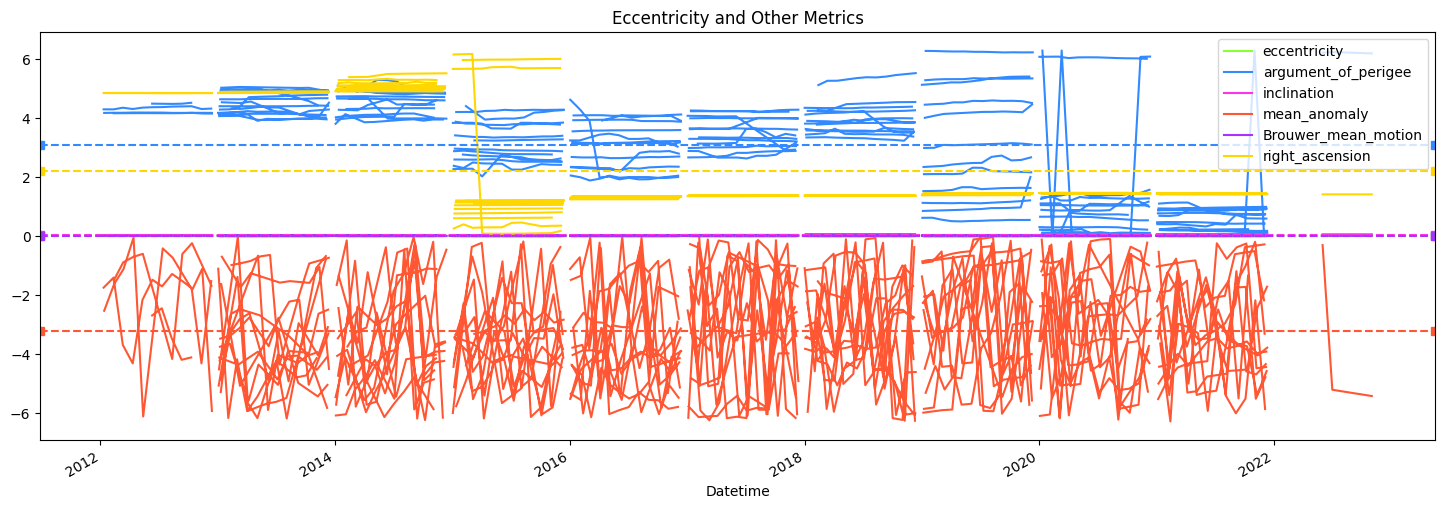

In [13]:
colors = {
    "eccentricity": "#8aff33",  # Light Green
    "mean_anomaly": "#ff5733",  # Red
    "argument_of_perigee": "#338aff",  # Blue
    "inclination": "#ff33e6",  # Pink
    "Brouwer_mean_motion": "#a633ff",  # Purple
    "right_ascension": "#ffd700",  # Yellow
}

ax = df_plot.plot(style='-', figsize=(18,6), color=[colors[col] for col in df_plot.columns], title='Eccentricity and Other Metrics')

for col in df_plot.columns:
    ax.axhline(df_plot[col].mean(), marker='s', ls='--', color=colors[col])

plt.show()
# #Plot Values
# ax=df.plot(style='*', figsize=(18,6), color=[colors[col] for col in df.columns], title='Eccentricity')

# #add Horizontal Line Passing Through Mean of Temp Values
# ax.axhline(df["eccentricity"].mean(),marker='s',ls='--',color='blue')
# ax.axhline(df["mean_anomaly"].mean(),marker='s',ls='--',color='purple')
# ax.axhline(df["argument_of_perigee"].mean(),marker='s',ls='--',color='red')
# ax.axhline(df["inclination"].mean(),marker='s',ls='--',color='black')
# ax.axhline(df["Brouwer_mean_motion"].mean(),marker='s',ls='--',color='purple')
# ax.axhline(df["right_ascension"].mean(),marker='s',ls='--',color='orange')

In [14]:
df.head()

,eccentricity,argument_of_perigee,inclination,mean_anomaly,Brouwer_mean_motion,right_ascension,date,time
Datetime,,,,,,,,
2012-06-09 18:48:32.050655,0.000488,4.483911,0.032940,-2.689729,0.004374,4.842139,2012-06-09,18:48:32.050655
2012-07-09 19:39:45.383327,0.000487,4.481215,0.032901,-2.446726,0.004374,4.842234,2012-07-09,19:39:45.383327
2012-08-09 15:43:39.075167,0.000487,4.475122,0.032868,-3.457326,0.004374,4.842332,2012-08-09,15:43:39.075167
2012-09-09 12:53:36.595967,0.000492,4.481063,0.032835,-4.190783,0.004374,4.842201,2012-09-09,12:53:36.595967
2012-10-09 13:15:22.135391,0.000495,4.512943,0.032798,-4.111348,0.004374,4.842257,2012-10-09,13:15:22.135391


In [15]:
# Convert the first column to datetime and store it in a new column
#df["Datetime"] = pd.to_datetime(df.iloc[:, 0], dayfirst=True, errors='coerce')

# Drop the old column if necessary
#df = df.drop(columns=[df.columns[0]])

# Sort DataFrame by the new datetime column
df = df.sort_values(by="Datetime")
df.reset_index(drop=False, inplace=True)

df['Datetime'] = df['Datetime'].astype('int64') #// 10**9  # Convert to Unix timestamp
print(df.head())
print(len(df))

              Datetime  eccentricity  argument_of_perigee  inclination  \
0  1326225656903615000      0.000365             4.290712     0.032004   
1  1326371462376192000      0.000772             4.169016     0.029702   
2  1328908476161664000      0.000365             4.290175     0.031966   
3  1328984698034303000      0.000797             4.158818     0.030789   
4  1329062146412832000      0.000766             4.174468     0.029660   

   mean_anomaly  Brouwer_mean_motion  right_ascension        date  \
0     -1.747158             0.004375         4.843741  2012-01-10   
1     -2.531717             0.004375         4.843606  2012-01-12   
2     -1.406915             0.004375         4.843577  2012-02-10   
3     -1.496276             0.004376         4.846296  2012-02-11   
4     -1.623926             0.004375         4.843653  2012-02-12   

              time  
0  20:00:56.903615  
1  12:31:02.376192  
2  21:14:36.161664  
3  18:24:58.034303  
4  15:55:46.412832  
2985


In [16]:
#Split data for Train Test

In [17]:
# Select ratio
train_ratio = 0.75
val_ratio = 0.15
#df.drop(columns=["index"], inplace=True)

total_rows = df.shape[0]
train_size = int(total_rows*train_ratio)

# Split data into test and train
train = df[0:train_size]
test_ = df[train_size:]

toal_test_row=test_.shape[0]
val_size=int(toal_test_row*val_ratio)

# Split test data into val and test
val = test_[0:val_size]
test = test_[val_size:]


In [18]:
y_train = train.drop(columns=['date', 'time','Datetime'])  # Features
X_train = train[['Datetime']]  # 2D Target Label

y_val = val.drop(columns=['date', 'time','Datetime'])  # Features
X_val = val[['Datetime']]  # 2D Target Label

y_test = test.drop(columns=['date', 'time','Datetime'])  # Features
X_test = test[['Datetime']]  # 2D Target Label

In [19]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2238, 1) (2238, 6) (635, 1) (635, 6)


In [20]:
print(y_train)

      eccentricity  argument_of_perigee  inclination  mean_anomaly  \
0         0.000365             4.290712     0.032004     -1.747158   
1         0.000772             4.169016     0.029702     -2.531717   
2         0.000365             4.290175     0.031966     -1.406915   
3         0.000797             4.158818     0.030789     -1.496276   
4         0.000766             4.174468     0.029660     -1.623926   
...            ...                  ...          ...           ...   
2233      0.000276             3.341915     0.041820     -2.389132   
2234      0.000275             3.328570     0.041851     -3.865505   
2235      0.000278             3.316071     0.041891     -2.717125   
2236      0.000285             3.314876     0.041935     -1.762154   
2237      0.000289             3.313455     0.041973     -1.712086   

      Brouwer_mean_motion  right_ascension  
0                0.004375         4.843741  
1                0.004375         4.843606  
2                0.00437

In [21]:
datatypes = train.dtypes 
  
# Print the data types 
# of each column 
datatypes

Datetime                 int64
eccentricity           float64
argument_of_perigee    float64
inclination            float64
mean_anomaly           float64
Brouwer_mean_motion    float64
right_ascension        float64
date                    object
time                    object
dtype: object

In [22]:
!pip install xgboost
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import sklearn
print(sklearn.__version__)

1.6.1


In [24]:
#XGB Model Defination & Training

In [35]:
import xgboost as xgb
from sklearn.metrics import  mean_absolute_error

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
#Define and Fit XG Boost Regressor Model
#reg_model = xgb.XGBRegressor(n_estimators=500)
#Declare Evaluation data 
#eval_data=[(X_train, y_train), (X_val, y_val)]
#reg_model.fit(X_train, y_train,eval_set=eval_data,verbose=True)
print(dtrain)

In [36]:
params = {
    "objective": "reg:squarederror",  # Use "reg:squarederror" for regression
    "eval_metric": "logloss",
    "max_depth": 100000,
    "learning_rate": 0.1
}

model = xgb.train(params, dtrain, num_boost_round=100)

In [37]:
# Assuming dtest is already defined
#y_test = dtest.get_label()  # Get true labels
y_pred = model.predict(dtest)  # Predict probabilities

In [38]:
print(len(y_test),len(y_pred))

635 635


Mean Squared Error (MSE): 2.0737
Mean Absolute Error (MAE): 0.9167
R² Score: -778.2526


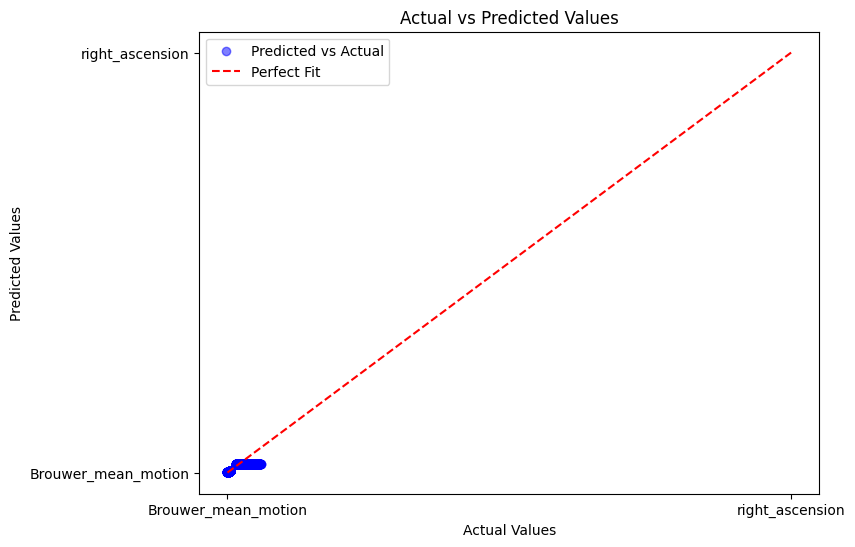

In [39]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

In [40]:
#Prediction
columns = ['eccentricity', 'argument_of_perigee', 'inclination',
           'mean_anomaly', 'Brouwer_mean_motion', 'right_ascension']


# Create a list to store rows
rows = []

# Append data using a loop
for row in y_pred:
    rows.append(row)

# Convert list of rows to DataFrame
predictions = pd.DataFrame(rows, columns=columns)
# Display DataFrame
#print(predictions)
print(y_test)

      eccentricity  argument_of_perigee  inclination  mean_anomaly  \
2350      0.000314             4.556034     0.048623     -6.021372   
2351      0.000314             4.555000     0.048670     -3.577089   
2352      0.000317             4.539038     0.048709     -3.387197   
2353      0.000318             4.536296     0.048733     -5.401286   
2354      0.000319             4.534004     0.048770     -5.350595   
...            ...                  ...          ...           ...   
2980      0.000335             0.245844     0.057671     -4.683170   
2981      0.000334             0.235228     0.057713     -4.624574   
2982      0.000321             0.130872     0.058654     -5.971778   
2983      0.000330             0.082144     0.058788     -2.965046   
2984      0.000355             0.140658     0.058901     -4.964060   

      Brouwer_mean_motion  right_ascension  
2350             0.004375         1.355763  
2351             0.004375         1.355609  
2352             0.00437

In [41]:
club_df= pd.concat([y_test,predictions,], sort=False)
club_df.tail()

,eccentricity,argument_of_perigee,inclination,mean_anomaly,Brouwer_mean_motion,right_ascension
630,0.000288,3.778693,0.019659,-3.255742,0.004387,2.745833
631,0.000288,3.778693,0.019659,-3.255742,0.004387,2.745833
632,0.000288,3.778693,0.019659,-3.255742,0.004387,2.745833
633,0.000288,3.778693,0.019659,-3.255742,0.004387,2.745833
634,0.000288,3.778693,0.019659,-3.255742,0.004387,2.745833


In [42]:
y_test["eccentricity"]

2350    0.000314
2351    0.000314
2352    0.000317
2353    0.000318
2354    0.000319
          ...   
2980    0.000335
2981    0.000334
2982    0.000321
2983    0.000330
2984    0.000355
Name: eccentricity, Length: 635, dtype: float64

In [43]:
predictions["eccentricity"]

0      0.000288
1      0.000288
2      0.000288
3      0.000288
4      0.000288
         ...   
630    0.000288
631    0.000288
632    0.000288
633    0.000288
634    0.000288
Name: eccentricity, Length: 635, dtype: float32

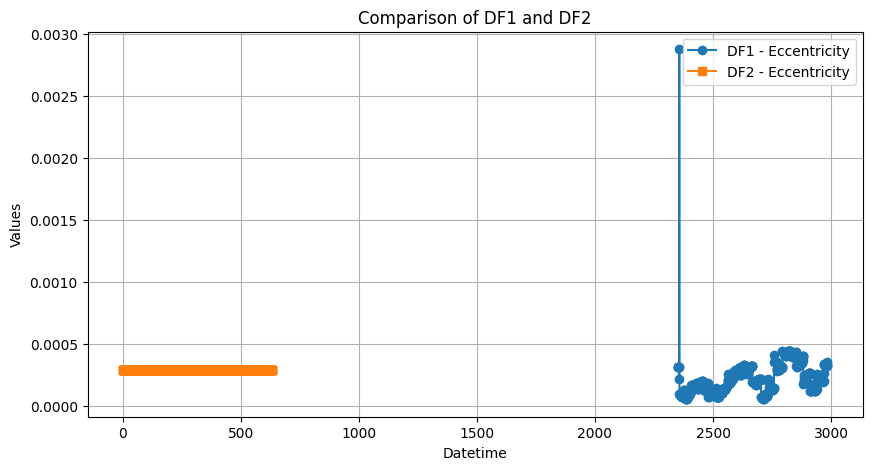

In [44]:
# Set figure size
plt.figure(figsize=(10, 5))

# Plot eccentricity
plt.plot( y_test["eccentricity"], marker='o', label="DF1 - Eccentricity")
plt.plot( predictions["eccentricity"], marker='s', label="DF2 - Eccentricity")

# Plot inclination
#plt.plot(y_test["inclination"], marker='^', label="DF1 - Inclination")
#plt.plot(predictions["inclination"], marker='v', label="DF2 - Inclination")

# Labels and legend
plt.xlabel("Datetime")
plt.ylabel("Values")
plt.title("Comparison of DF1 and DF2")
plt.legend()
plt.grid(True)

# Show plot
plt.show()